## Загрузка необходимых библиотек

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
%matplotlib inline
from sklearn. preprocessing import StandardScaler
from sklearn.decomposition import PCA
plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Загрузка датасета

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/summary.csv')

#### Посмотрим 5 первых и последних строк набора данных

In [ ]:
df.head()

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [ ]:
df.tail()

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1
1339,Jon Barry,47,11.7,4.4,1.6,4.4,36.9,0.4,1.3,33.3,0.7,1.0,67.3,0.2,0.7,0.9,1.4,0.7,0.1,0.9,1


#### Уже на данном этапе видно, что в исследуемых данных присутствует строковый столбец имен и вещественные столбцы с характеристиками, пропущенных значений пока не видно
#### Также можно сказать, что исследуются данные о спортсменах, в датасете содержатся значения характеристик спортсмена, его номер, количество сыгранных минут, очки за игру и тд
#### Задачей данной работы является ускорение или повышение эффективности обучения с учителем при помощи понижения размерности, обнаружения аномалий или кластеризации. 
#### Будет построена модель классификации. Целевая переменная таргет=0 (игрок имеет карьеру менее 5 лет) или 1( игрок имеет карьеру 5 и более лет)

#### Узнаем размер датасета

In [ ]:
df.shape

(1340, 21)

#### Итак, в датасете имеется 1340 строк и 21 столбец (признак, атрибут)
#### Посмотрим, данные каких типов есть в датасете

In [ ]:
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,Name,object
1,GamesPlayed,int64
2,MinutesPlayed,float64
3,PointsPerGame,float64
4,FieldGoalsMade,float64
5,FieldGoalsAttempt,float64
6,FieldGoalPercent,float64
7,3PointMade,float64
8,3PointAttempt,float64
9,3PointPercent,float64


In [ ]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,2
1,float64,18
2,object,1


#### Как и предполагалось ранее, в датасете есть строковые, вещественные и целочисленные данные
#### Теперь узнаем, есть ли пропущенные значения и в каком процентном количестве

In [ ]:
df.isnull().sum()

Name                  0
GamesPlayed           0
MinutesPlayed         0
PointsPerGame         0
FieldGoalsMade        0
FieldGoalsAttempt     0
FieldGoalPercent      0
3PointMade            0
3PointAttempt         0
3PointPercent        11
FreeThrowMade         0
FreeThrowAttempt      0
FreeThrowPercent      0
OffensiveRebounds     0
DefensiveRebounds     0
Rebounds              0
Assists               0
Steals                0
Blocks                0
Turnovers             0
Target                0
dtype: int64

####  В столбце 3PointPercent есть небольшое количество пропущенных значений, удалим строки с ними

In [ ]:
#df = df.drop(['название столбца'], axis=1)

In [ ]:
df=df.dropna() 

#### для другого датасета можно попробовать для числовых заменить пропуски на среднее df=df.fillna(df.mean()), а категориальные на моду df=df.fillna(df.mode()). 

In [ ]:
df.isnull().sum()

Name                 0
GamesPlayed          0
MinutesPlayed        0
PointsPerGame        0
FieldGoalsMade       0
FieldGoalsAttempt    0
FieldGoalPercent     0
3PointMade           0
3PointAttempt        0
3PointPercent        0
FreeThrowMade        0
FreeThrowAttempt     0
FreeThrowPercent     0
OffensiveRebounds    0
DefensiveRebounds    0
Rebounds             0
Assists              0
Steals               0
Blocks               0
Turnovers            0
Target               0
dtype: int64

#### Теперь нет пропусков

#### Узнаем, сколько уникальных значений содержит каждый столбец

In [ ]:
df.nunique()

Name                 1284
GamesPlayed            70
MinutesPlayed         325
PointsPerGame         191
FieldGoalsMade         87
FieldGoalsAttempt     159
FieldGoalPercent      283
3PointMade             23
3PointAttempt          54
3PointPercent         254
FreeThrowMade          59
FreeThrowAttempt       76
FreeThrowPercent      382
OffensiveRebounds      44
DefensiveRebounds      74
Rebounds              101
Assists                77
Steals                 26
Blocks                 28
Turnovers              41
Target                  2
dtype: int64

#### Столбец Name содержит слишком много уникальных значений, является строковым, считаем, что он не информативен для дальнейших исследований, поэтому удаляем

In [ ]:
df = df.drop(['Name'], axis=1)

#### С помощью функции describe выведем и рассмотрим описательные статистики для всех атрибутов

In [ ]:
df.describe()

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,60.402558,17.647931,6.820166,2.634763,5.902483,44.117532,0.249661,0.785628,19.308126,1.302784,1.827314,70.407148,1.007600,2.021445,3.028442,1.558992,0.620391,0.366140,1.196012,0.621520
std,17.481092,8.327441,4.365671,1.686850,3.598820,6.119492,0.384608,1.063856,16.022916,0.989341,1.326655,10.489838,0.779178,1.362464,2.062357,1.474159,0.410533,0.428534,0.724470,0.485191
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.800000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.800000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.600000,2.100000,4.800000,43.900000,0.100000,0.300000,22.400000,1.000000,1.500000,71.300000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.800000,0.400000,1.200000,32.500000,1.700000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


#### Во многих столбцах (PointsPerGame, FieldGoalsMade, FieldGoalPercent, 3PointMade и др) максимальное значение и значение 75%квартиля очень сильно различаются, это говорит о наличии выбросов. Также в большинстве случаев значение стандартного отклонения далеко от 0, это говорит об отсутствии тенденции точек данных быть близкими к их среднему. Также здесь можно увидеть средние  сыгранные минуты, среднее количество штрафнфх бросков и тд

In [ ]:
#df.describe(include='object')

#### 

#### Переведем категориальные данные в числовые

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le= LabelEncoder()

#le.fit(df['столбец 1'])
#df['столбец 1']=le.transform(df['столбец 1'])

#le.fit(df['столбец 2'])
#df['столбец 2']=le.transform(df['столбец 2'])

Построим гистограмму, найдем выбросы (ящиковая диаграмма), удалим аномальные значения, если они имеются, постараемся привести к нормальному распределению столбцы MinutesPlayed,	PointsPerGame,	FieldGoalsMade,	FieldGoalsAttempt,	FieldGoalPercent(первые 5 столбцов)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


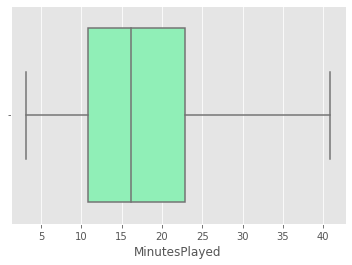

In [ ]:
import seaborn as sns
sns.boxplot(df['MinutesPlayed'], palette='rainbow')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


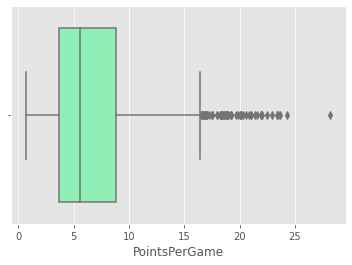

In [ ]:
sns.boxplot(df['PointsPerGame'], palette='rainbow')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


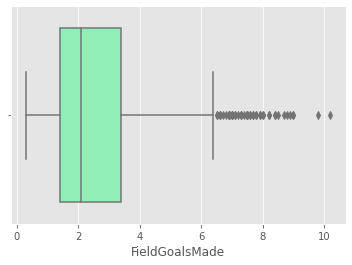

In [ ]:
sns.boxplot(df['FieldGoalsMade'], palette='rainbow')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


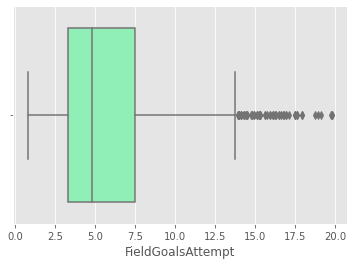

In [ ]:
sns.boxplot(df['FieldGoalsAttempt'], palette='rainbow')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


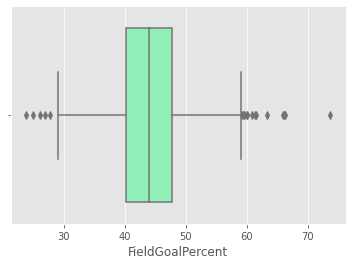

In [ ]:
sns.boxplot(df['FieldGoalPercent'], palette='rainbow')

Ни в одном поле аномалий не обнаружено, конечно, если бы мы имели действительно большие данные(более 100000 строк), аномалии бы вероятнее всего возникли, но здесь ящик с усами показывает, что данный датасет является чистым

In [ ]:
#но если были бы то вот: тут смотрим как выглядит график без максимального значения
# maxi = max(data['price'])
# data_plot = data.loc[data['price'] < maxi]
# sns.boxplot(data_plot['price'], palette='rainbow')

In [ ]:
# далее применяем метод интерквартильного размаха, грубый перевод из Вики позволяет использовать его для избавления от выбросов:
# Межквартильный размах часто используется для поиска выбросов в данных. 
# Выбросы здесь определяются как наблюдения, которые падают ниже Q1 - 1,5 IQR или выше Q3 + 1,5 IQR. 
# На диаграмме высшее и наименьшее встречающиеся значения в пределах этого предела обозначены усами прямоугольника (часто с дополнительной полосой в конце усов), 
# а любые выбросы - отдельными точками.

# mid_50 = data['price'].quantile([.25, .75])
# price_25, price_75 = mid_50.iloc[0], mid_50.iloc[1]

# iqr = price_75 - price_25
# low = price_25 - 1.5 * iqr
# high = price_75 + 1.5 * iqr

# low, iqr, high

In [ ]:
# data = data.loc[data['price'] < high]
# print('Count: ', data.shape[0], '\nMin price: ', data['price'].min(), '\nMax price:', data['price'].max())

## Выделяем целевую переменную и факторные переменные

In [ ]:
X = df.drop(['Target'], axis=1)
y = df['Target'] 

####  Для выявления зависимостей между признаками и целевоу переменной выведем матрицу корреляции

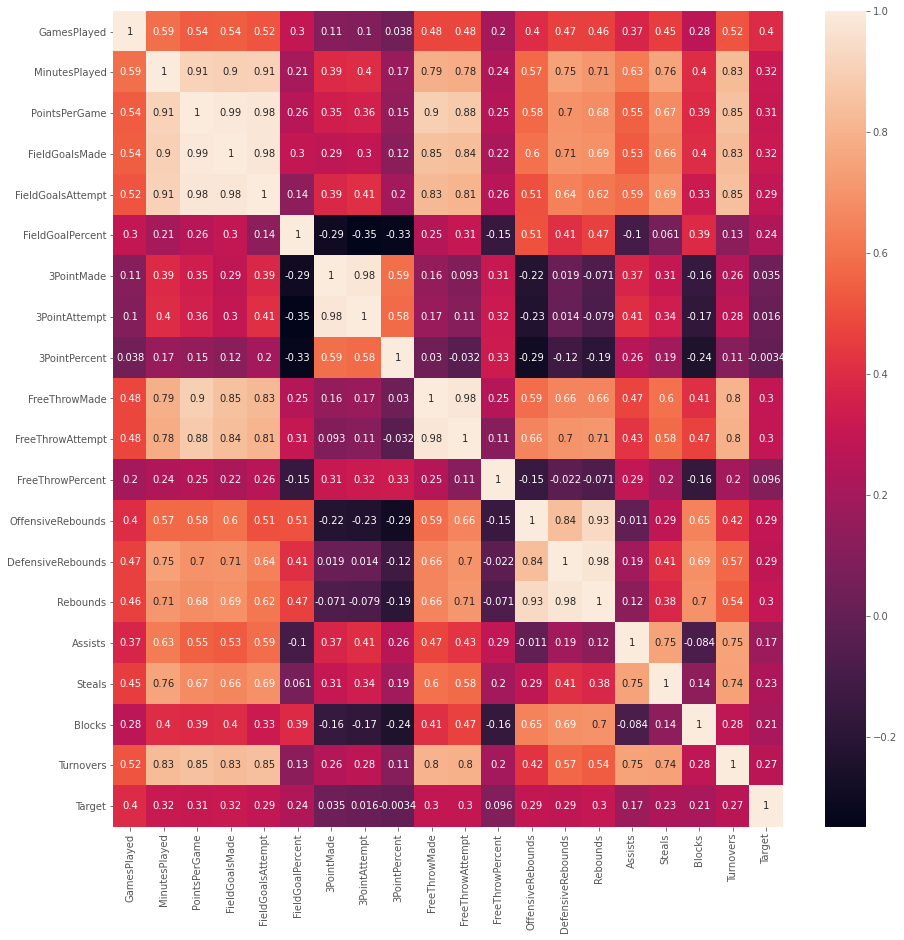

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

#### 

### Построим модель регрессии и попробуем выяснить длину карьеры игрока

## Деление выборки на тестовую и обучающую

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)

In [ ]:
LogRegr = LogisticRegression()
LogRegr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Для оценки эффективности полученной модели сделаем предсказания по нашему классификатору на тестовой выборке (там, где мы уже знаем правильные ответы, чтобы сравнить, насколько предсказания расходятся с действительностью):

In [ ]:
y_pred = LogRegr.predict(X_test)

#### Оценим эффективность предсказания тестовой выборки при помощи матрицы классификации:

Text(0.5, 15.0, 'Предсказанные значения')

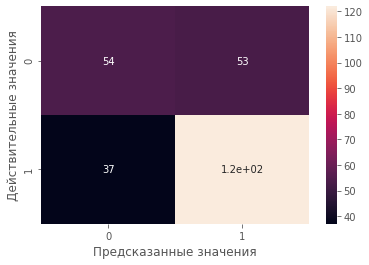

In [ ]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

## Общее число точных прогнозов около 172, а ложных около 90
#### Метрика достоверности предсказания:

In [ ]:
metrics.accuracy_score(y_test, y_pred) 

0.6616541353383458

#### Метрика точности
#### Точность - это соотношение tp / (tp + fp), где tp - количество истинных срабатываний и fp - количество ложных срабатываний. 
#### Точность - это интуитивно понятная способность классификатора не помечать отрицательный образец как положительный. Лучшее значение - 1, а худшее - 0.

In [ ]:
metrics.precision_score(y_test, y_pred) 

0.6971428571428572

#### Метрика полноты - это соотношение tp / (tp + fn), где tp - количество истинных положительных результатов и fn - количество ложных отрицательных результатов. 
#### Метрика полноты - это интуитивно понятная способность классификатора находить все положительные образцы. Лучшее значение - 1, а худшее - 0.

In [ ]:
metrics.recall_score(y_test, y_pred)

0.7672955974842768

In [ ]:
accuracy1,precision1,recall1=metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)
accuracy1,precision1,recall1

(0.6616541353383458, 0.6971428571428572, 0.7672955974842768)

### Значения метрик средние, попробуем улучшить модель, используя методы работы без учителя

## Метод опорных векторов с гауссовым ядром 
### Другие методы для классификации

In [ ]:
SVCCLS = SVC(kernel='rbf')
SVCCLS.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = SVCCLS.predict(X_test)

Text(0.5, 15.0, 'Предсказанные значения')

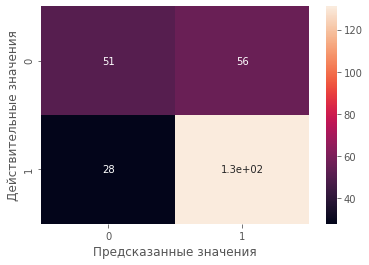

In [ ]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred) 

0.6842105263157895

In [ ]:
metrics.precision_score(y_test, y_pred) 

0.7005347593582888

In [ ]:
metrics.recall_score(y_test, y_pred)

0.8238993710691824

## Метод k ближайших соседей
### еще метод

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsCLS = KNeighborsClassifier()
KNeighborsCLS.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Text(0.5, 15.0, 'Предсказанные значения')

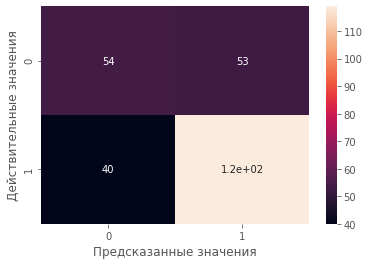

In [ ]:
y_pred = KNeighborsCLS.predict(X_test)
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred) 

0.650375939849624

In [ ]:
metrics.precision_score(y_test, y_pred) 

0.6918604651162791

In [ ]:
metrics.recall_score(y_test, y_pred)

0.7484276729559748

## Метод опорных векторов с линейным ядром 
### еще метод

In [ ]:
from sklearn.svm import SVC
LinearSVCCLS = SVC(kernel='linear')
LinearSVCCLS.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = LinearSVCCLS.predict(X_test)

Text(0.5, 15.0, 'Предсказанные значения')

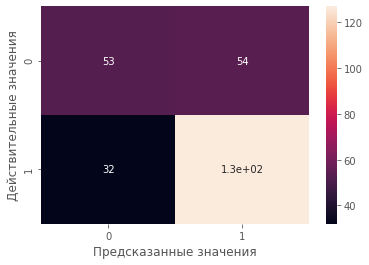

In [ ]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred) 
#metrics.precision_score(y_test, y_pred) 
#metrics.recall_score(y_test, y_pred)

0.6766917293233082

In [ ]:
metrics.precision_score(y_test, y_pred) 

0.7016574585635359

In [ ]:
metrics.recall_score(y_test, y_pred)

0.7987421383647799

### Еще метод Многослойный классификатор персептрона.

In [ ]:
from sklearn.neural_network import MLPClassifier
MLPCLS = MLPClassifier()
MLPCLS.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred = MLPCLS.predict(X_test)

Text(0.5, 15.0, 'Предсказанные значения')

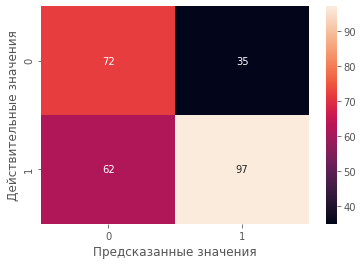

In [ ]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred) 
#metrics.precision_score(y_test, y_pred) 
#metrics.recall_score(y_test, y_pred)

0.6353383458646616

In [ ]:
metrics.precision_score(y_test, y_pred)

0.7348484848484849

In [ ]:
metrics.recall_score(y_test, y_pred)

0.610062893081761

In [ ]:
metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)

(0.6353383458646616, 0.7348484848484849, 0.610062893081761)

## Рандом форест

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ForestCLS= RandomForestClassifier()
ForestCLS.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = ForestCLS.predict(X_test)

Text(0.5, 15.0, 'Предсказанные значения')

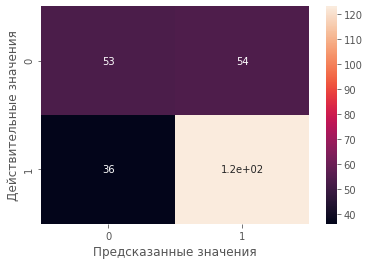

In [ ]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred) 

0.6616541353383458

In [ ]:
metrics.precision_score(y_test, y_pred)

0.6949152542372882

In [ ]:
metrics.recall_score(y_test, y_pred)

0.7735849056603774

### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
TreeCLS= RandomForestClassifier()
TreeCLS.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = TreeCLS.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)

(0.6466165413533834, 0.6836158192090396, 0.7610062893081762)

### Кластеризация Метод Kmeans

In [ ]:
dfKlaster=df.copy()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
y_pred = kmeans.fit_predict(X)

In [ ]:
dfKlaster['Target']=y_pred

In [ ]:
dfKlaster.head()

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,1
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,1
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [ ]:
df.head()

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


### Видно, что значени Целевой функции изменились

### Понижение размерности РСА
#### Перед применением метода необходимо провести Стандартизацию данных

In [ ]:
scaler = StandardScaler()
scaler. fit(X)
X_scaled = scaler.transform(X)
X.shape

(1329, 19)

#### Применение РСА для исходного числа признаков, чтобы определить насколько хорошо алгоритм улавливает дисперсию данных

In [ ]:
pca_19 = PCA(n_components=19, random_state=2020)
pca_19.fit(X_scaled)
X_pca_19= pca_19.transform(X_scaled)

In [ ]:
print("Дисперсия, объяснённая всеми 19 главными компонентами =",
    sum(pca_19.explained_variance_ratio_ * 100))

Дисперсия, объяснённая всеми 19 главными компонентами = 100.0


In [ ]:
pca_19.explained_variance_ratio_ * 100

array([5.01810915e+01, 2.05040204e+01, 6.46465921e+00, 4.59853310e+00,
       3.91243337e+00, 3.11987584e+00, 2.64149175e+00, 2.35265498e+00,
       2.09398421e+00, 1.37178221e+00, 1.22311987e+00, 5.79383599e-01,
       5.26487280e-01, 2.85460022e-01, 7.73061345e-02, 4.03577977e-02,
       2.45342424e-02, 1.93696018e-03, 8.87536458e-04])

### Первый главный компонент, один из признако вобъясняет 50 процентов дисперсии и тд

#### Построение графика зависимости процента объяснённой дисперсии от количества компонентов

Text(0, 0.5, '% объяснённой дисперсии')

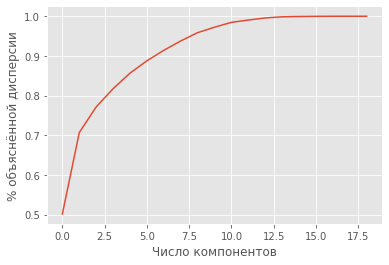

In [ ]:
plt.plot(np.cumsum(pca_19.explained_variance_ratio_))
plt.xlabel('Число компонентов')
plt.ylabel('% объяснённой дисперсии')

### По графику видно, что 12 признаков из 19 объясняют почти весь набор данных

In [ ]:
print("Дисперсия, объяснённая первым главным компонентом =",
      np.cumsum(pca_19.explained_variance_ratio_ * 100)[0])
print("Дисперсия, объяснённая первыми двумя главными компонентами =",
      np.cumsum(pca_19.explained_variance_ratio_ * 100)[1])
print("Дисперсия, объяснённая первыми тремя главными компонентами =" ,
      np.cumsum(pca_19.explained_variance_ratio_ * 100)[2])
print("Дисперсия, объяснённая первыми 12 главными компонентами =",
      np.cumsum(pca_19.explained_variance_ratio_*100)[11])

Дисперсия, объяснённая первым главным компонентом = 50.18109150871767
Дисперсия, объяснённая первыми двумя главными компонентами = 70.68511189168589
Дисперсия, объяснённая первыми тремя главными компонентами = 77.14977109967892
Дисперсия, объяснённая первыми 12 главными компонентами = 99.04303002675535


#### Проведем РСА с сохранением 99% дисперсии

In [ ]:
pca_99 = PCA(n_components=0.99, random_state=2020)
pca_99.fit(X_scaled)
X_pca_99 = pca_99.transform(X_scaled)

In [ ]:
X_pca_99.shape

(1329, 12)

#### Уменьшили количество признаков до 12, теперь соединяем датасет с ЦФ

In [ ]:
dfKlaster_PCA = pd.DataFrame(X_pca_99, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12'])

In [ ]:
Target=dfKlaster['Target']
dfKlaster_PCA= pd.concat([dfKlaster_PCA, Target], axis=1)
dfKlaster_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,Target
0,0.752446,1.225623,1.417699,1.114709,1.478161,0.482505,-0.391775,0.260648,-0.360249,0.138662,-0.782671,0.841939,1.0
1,1.369880,2.999660,0.155569,1.606580,1.931763,0.845466,-0.891332,0.576567,0.654485,-1.338103,-0.122668,0.274873,1.0
2,-0.978817,0.797069,0.579092,-0.059004,-0.809308,0.242194,-0.155354,-0.783915,0.216279,-0.150613,0.015313,0.202460,0.0
3,-1.390802,0.113382,-0.352939,-0.047073,0.088370,-0.169813,0.460905,-0.333485,-0.294310,0.127931,0.511613,-0.418621,1.0
4,-1.641404,-1.865789,-0.223249,-0.291817,0.104649,-1.215167,-0.484791,0.220244,0.330581,-0.450783,-0.113737,-0.016799,1.0


In [ ]:
dfKlaster_PCA.shape #Не знаю,почему тут добавляются строки лишние, из-за них появляются пустые значения, которые я удаляю дальше

(1340, 13)

In [ ]:
dfKlaster_PCA=dfKlaster_PCA.dropna()

### Снова строим модель классификации и сверяем параметры. Буду делать на логистической

In [ ]:
X = dfKlaster_PCA.drop(['Target'], axis=1)
y = dfKlaster_PCA['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)

In [ ]:
dfKlaster_PCA.shape

(1318, 13)

In [ ]:
LogRegr2 = LogisticRegression()
LogRegr2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = LogRegr2.predict(X_test)

Text(0.5, 15.0, 'Предсказанные значения')

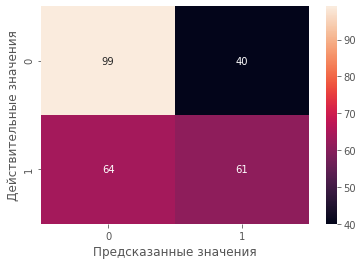

In [ ]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
accuracy2,precision2,recall2=metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)
accuracy2,precision2,recall2

(0.6060606060606061, 0.6039603960396039, 0.488)

In [ ]:
accuracy1,precision1,recall1

(0.6616541353383458, 0.6971428571428572, 0.7672955974842768)

### После применения метода Ксредних и РСА модель стала хуже
